# Prosper Loans Data Exploration



# What affects the Borrower’s APR and the loan’s outcome status?


## Investigation Overview

As part of this investigation, we attempted to identify the characteristics that could affect the borrower's APR and the loan outcome, as well as how it might interact with them.

## Dataset Overview

Prosper is the first peer-to-peer American lending marketplace, with more than 2 million members and over two billion dollars in funded loans. The data set available to the public (last updated on March 11th, 2014) contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. We will keep only the most important feature to try to answer the questions.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
features = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
            'EmploymentStatus','EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
            'CreditScoreRangeUpper', 'OpenRevolvingMonthlyPayment', 'CurrentDelinquencies', 'AmountDelinquent',
            'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'DebtToIncomeRatio',
            'IncomeRange', 'LoanOriginalAmount']
loan_data = loan_data[features]

In [4]:
loan_data['ListingCategory (numeric)'] = loan_data['ListingCategory (numeric)'].apply(str)
loan_data = loan_data.rename(index=str, columns={'ListingCategory (numeric)': "ListingCategory"})

In [5]:
# convert LoanStatus, ListingCategory, BorrowerState, EmploymentStatus and IncomeRange into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Current','Completed','Chargedoff','Defaulted', 'FinalPaymentInProgress',
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ListingCategory': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                                        '13', '14', '15', '16', '17', '18', '19', '20'],
                    'BorrowerState': ['CA', 'NY', 'TX', 'FL', 'IL', 'OH', 'GA', 'VA', 'NJ', 'PA', 'MI', 'NC',
                                      'MD', 'WA', 'MA', 'MO', 'MN', 'CO', 'IN', 'TN', 'WI', 'CT', 'AZ', 'AL',
                                      'OR', 'NV', 'SC', 'KY', 'KS', 'LA', 'AR', 'OK', 'MS', 'NE', 'UT', 'NH',
                                      'RI', 'ID', 'DC', 'HI', 'NM', 'WV', 'DE', 'MT', 'SD', 'VT', 'AK', 'WY'],
                    'EmploymentStatus': ['Employed', 'Full-time', 'Part-time', 'Self-employed', 'Not employed',
                                         'Retired', 'Other'], 
                    'IncomeRange': ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_data[var] = loan_data[var].astype(ordered_var)
loan_data = loan_data.dropna().reset_index()

## Distribution of Borrower APR

Borrower APR in the dataset take values from about 5% at the lowest, to about 40% at the highest. Except for values around 35%, the distribution has a bell-like shape. 36% is the most frequent rate and 21% is the mean rate

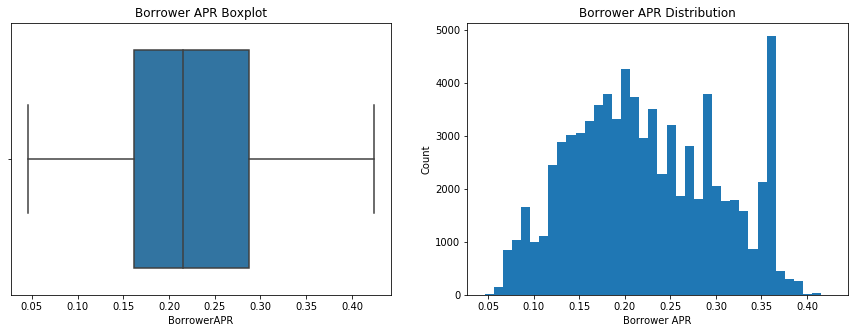

In [73]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.boxplot(data = loan_data, x = 'BorrowerAPR', color = sb.color_palette()[0])
plt.title('Borrower APR Boxplot')

plt.subplot(1, 2, 2)
binsize = 0.01
bins = np.arange(loan_data['BorrowerAPR'].min(), loan_data['BorrowerAPR'].max()+binsize, binsize)
plt.hist(data = loan_data, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Borrower APR Distribution')
plt.show()

## Distribution of Loan status:

In the case of the loan status, current status is the most frequent with more than 5000, next comes completed status with 2000 loan. in third position Charged-off status with about 500 loans, then comes defaulted status with 50 loan and to a lesser extent, the past due status.

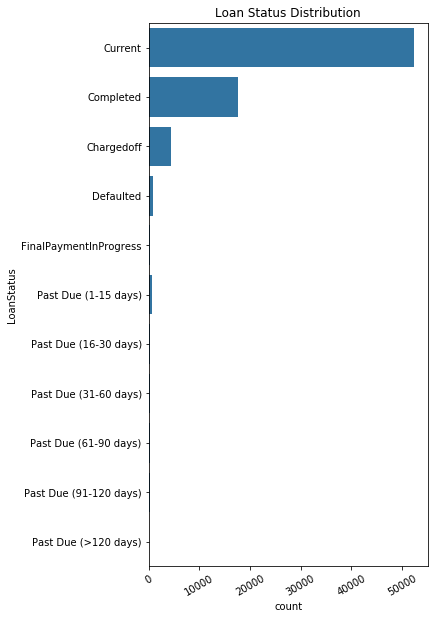

In [74]:
plt.figure(figsize = [5, 10])
sb.countplot(data = loan_data, y = 'LoanStatus', color = sb.color_palette()[0])
plt.xticks(rotation = 30)
plt.title('Loan Status Distribution');

Since we expected the income range, the loan original amount, debt to income ratio, prosper score to have the strongest effect on the the borrower’s APR and the loan outcome status lets explore there distributions.

## Distribution of Prosper Score

Prosper Score is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best. The distribution of the Prosper Score variable has a bell-like shape. 8 is the most frequent score and 6 is the mean score.

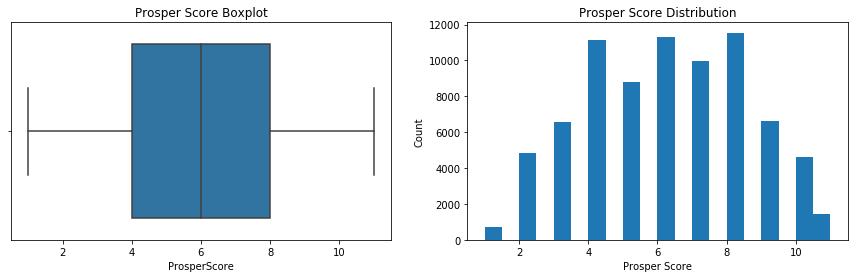

In [75]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
sb.boxplot(data = loan_data, x = 'ProsperScore', color = sb.color_palette()[0])
plt.title('Prosper Score Boxplot')

plt.subplot(1, 2, 2)
binsize = 0.5
bins = np.arange(loan_data['ProsperScore'].min(), loan_data['ProsperScore'].max()+binsize, binsize)
plt.hist(data = loan_data, x = 'ProsperScore', bins = bins)
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Prosper Score Distribution')
plt.show()

## Distribution of the Income Range

The most common Income Range was between 50k and 75k with about 24000 borrowers, then comes the range between 25k and 50k with 22000 borrowers and in the third place we have the ranges [75k, 100k] and [>100k ] with 14000 borrowers approximately

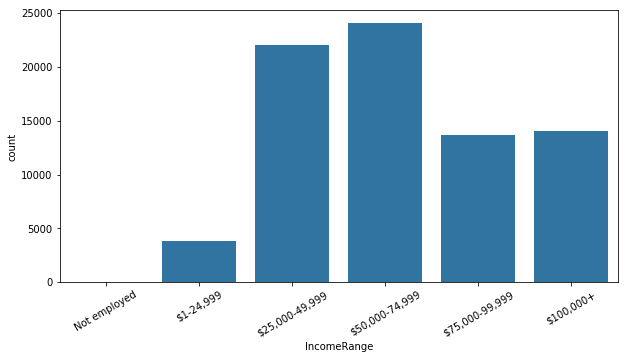

In [13]:
plt.figure(figsize = [10, 5])
sb.countplot(data = loan_data, x = 'IncomeRange', color = sb.color_palette()[0])
plt.xticks(rotation = 30)
plt.title('Income Range Distribution');

## Distribution of the Loan Original Amount
Loan Original Amount has a skewed distribution, with a lot of loans between 5k and 10k , and few higher than 30k. When plotted on a log-scale, the price distribution looks roughly bimodal, with one peak around 5k, and a second peak a little between 8k and 15k. We notice also that there are 503 outliers with loan amount higher than 30k.

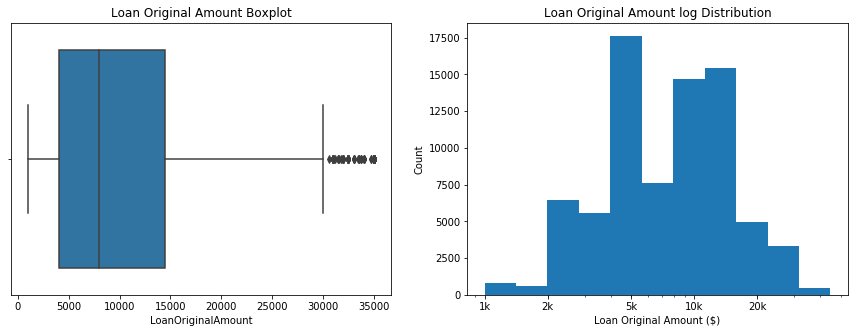

In [77]:
# there's a long tail in the distribution, so let's put it on a log scale instead
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.boxplot(data = loan_data, x = 'LoanOriginalAmount', color = sb.color_palette()[0])
plt.title('Loan Original Amount Boxplot')

plt.subplot(1, 2, 2)
log_binsize = 0.15
bins = 10 ** np.arange(np.log10(loan_data['LoanOriginalAmount'].min()), np.log10(loan_data['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = loan_data, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4], ['1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.title('Loan Original Amount log Distribution')
plt.show()

## Distribution of the Debt to Income Ratio
Debt To Income Ratio is unimodal, but the distribution is slightly right skewed and look a little narrower than a normal distribution. The box plot show too many outliers with values higher than 0.75.

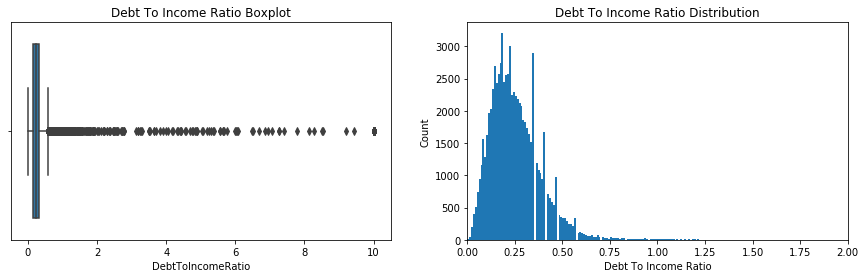

In [78]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
sb.boxplot(data = loan_data, x = 'DebtToIncomeRatio', color = sb.color_palette()[0])
plt.title('Debt To Income Ratio Boxplot')

plt.subplot(1, 2, 2)
binsize = 0.01
bins = np.arange(loan_data['DebtToIncomeRatio'].min(), loan_data['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = loan_data, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')
plt.title('Debt To Income Ratio Distribution')
plt.xlim([0,2])
plt.show()

## Borrower APR vs. Prosper Score

Borrower APR vs. Prosper Score show a moderate negative correlation between borrower APR and Prosper score.

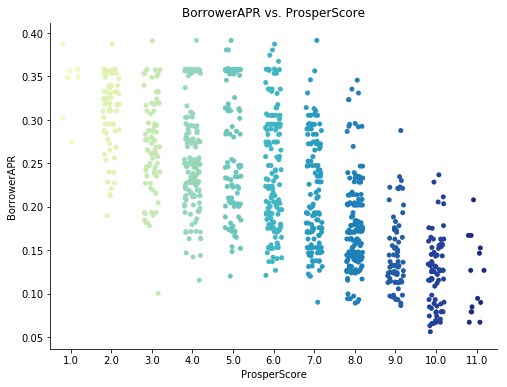

In [55]:
samples = np.random.choice(loan_data.shape[0], 1000, replace = False)
loan_data_samp = loan_data.loc[samples,:]

plt.figure(figsize = [8, 6])
sb.stripplot(x='ProsperScore', y='BorrowerAPR', data=loan_data_samp, jitter=0.2, palette = 'YlGnBu')
sb.despine()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR')

plt.show()

## Borrower APR vs. Loan Original Amount

Surprisingly, the correlation between borrower APR and LoanOriginalAmount is a moderate negative correlation, wich means higher loan original amount is expected to have lower borrower APR.

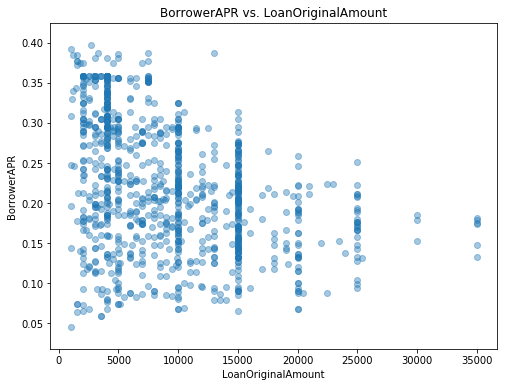

In [43]:
plt.figure(figsize = [8, 6])
plt.scatter(data = loan_data_samp, x='LoanOriginalAmount', y='BorrowerAPR', alpha = 0.4)
plt.title('BorrowerAPR vs. LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR')

plt.show()

## Borrower APR vs. Loan Status

Borrower APR vs. Loan Status plot reveal that Current and completed loan status have lower Borrower APR


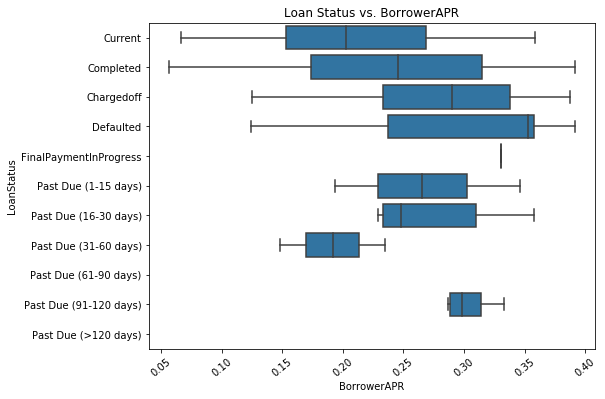

In [79]:
plt.figure(figsize = [8, 6])
sb.boxplot(data = loan_data_samp, x = 'BorrowerAPR', y = 'LoanStatus', color = sb.color_palette()[0])
plt.xticks(rotation =40)
plt.title('Loan Status vs. BorrowerAPR')
plt.show();

## Loan Status Distribution by Income Range

Borrower with Income range between 25 k and 75k are the biggest borrowers in all categories especially for Current loan status.


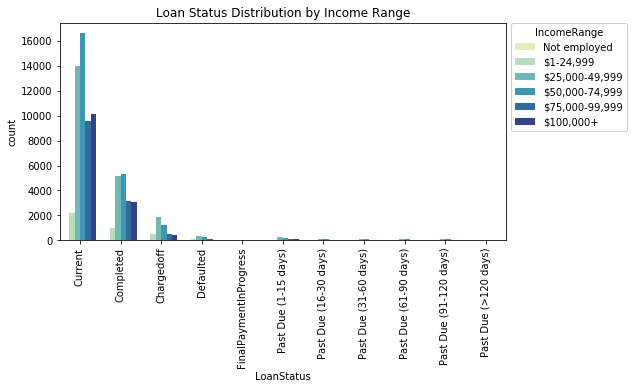

In [81]:
plt.figure(figsize = [8, 4])
ax = sb.countplot(data = loan_data, x = 'LoanStatus', hue = 'IncomeRange', palette = 'YlGnBu')
ax.legend(ncol = 2) 
plt.xticks(rotation = 90)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.75), framealpha = 1, title = 'IncomeRange')
plt.title('Loan Status Distribution by Income Range')
plt.show()

## Loan Status Distribution by Home Owner

For Current and Completed Loan Status there are more owners. On the other hand, the other categories show a parity between the two.

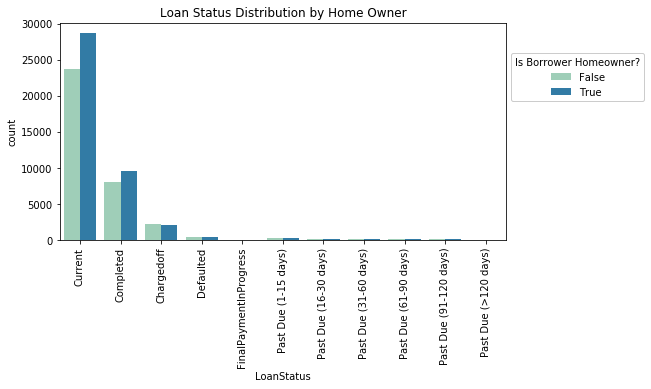

In [82]:
plt.figure(figsize = [8, 4])
ax = sb.countplot(data = loan_data, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'YlGnBu')
ax.legend(ncol = 2) 
plt.xticks(rotation = 90)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.75), framealpha = 1, title = 'Is Borrower Homeowner?')
plt.title('Loan Status Distribution by Home Owner')
plt.show()

## Debt to Income Ratio by Income Range and Loan Status

We notice that IncomeRange from 1 to 25k have the highest debt to income mean ratio especially for Past due Loans category reaching 2 times for (91 – 120 days).

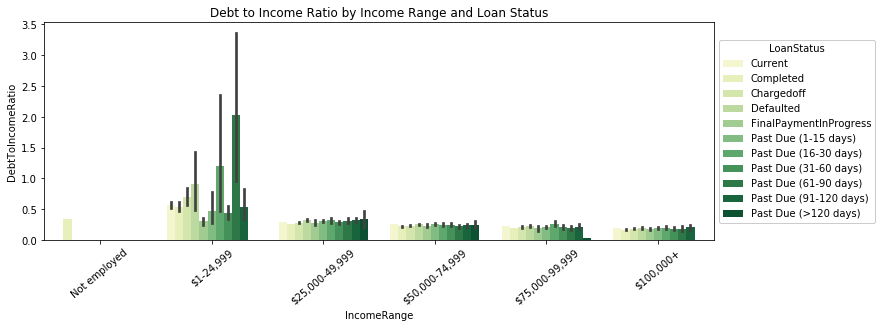

In [88]:
plt.figure(figsize = [12, 4])
sb.barplot(data = loan_data, x = 'IncomeRange', y = 'DebtToIncomeRatio', hue = 'LoanStatus', palette = 'YlGn')
plt.xticks(rotation = 40)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), framealpha = 1, title = 'LoanStatus')
plt.title('Debt to Income Ratio by Income Range and Loan Status');

## Borrower APR by Income Range and Loan Status

the pointplot show that current Loan Status has the lowest BorrowerAPR followed by completed Loan Status. Additionally, we confirm that higher income range results in lower BorrowerAPR.

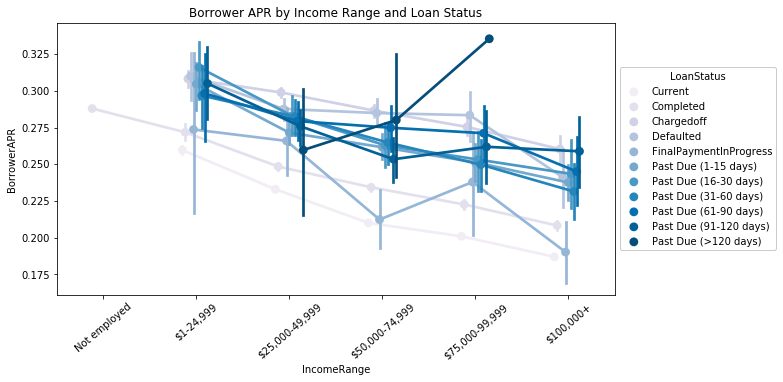

In [87]:
plt.figure(figsize = [10, 5])
ax = sb.pointplot(data = loan_data, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'LoanStatus',
                  dodge = 0.3, linestyles = "-", palette = 'PuBu')
plt.xticks(rotation = 40)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), framealpha = 1, title = 'LoanStatus')
plt.title('Borrower APR by Income Range and Loan Status');

## Loan Original Amount by Loan Status and Home owner

The plot shows that regardless of Loan Status Home Owners have higher loan original amount. In addition, Current LoanStutus is the highest one with 11800 Dollars for home owners and 9000 Dollars for non home owners. Finally, Past due (>120 days) is the most widespread with loan original amount ranging from 6000 to 13000 for home owners and 4000 to 11000 for non home owners.

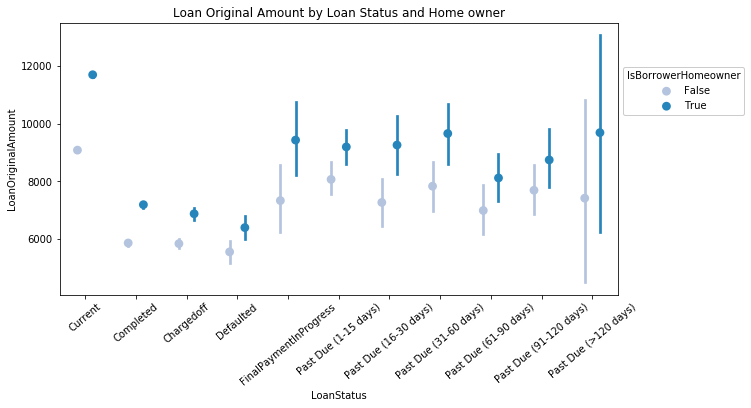

In [89]:
plt.figure(figsize = [10, 5])
ax = sb.pointplot(data = loan_data, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "", palette = 'PuBu')
plt.xticks(rotation = 40)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.75), framealpha = 1, title = 'IsBorrowerHomeowner')
plt.title('Loan Original Amount by Loan Status and Home owner');